HOW MUCH RED PAINT DOES IT TAKE TO BE FUNNIER THAN SOUND?

In [1]:

#INITIATE PROJECT 
from module.core.Project import Project

project = Project('TCB2')
project

/Users/jasminebutler/Desktop/phd/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Project(name='TCB2')

In [13]:
#INSPECT DATA
from module.core import  HPLC
data = HPLC('TCB2').df
data
data.select(compound='TYR', region = ['PL']) # outlier_status = 'suspected', 
# data.regions.unique() 

,mouse_id,group_id,value,compound,region
1600,2,1,18.690655,TYR,PL
1601,5,1,NaN,TYR,PL
1602,7,1,NaN,TYR,PL
1603,8,4,50.269196,TYR,PL
1604,9,1,53.569428,TYR,PL
...,...,...,...,...,...
1659,66,6,33.326984,TYR,PL
1660,67,1,36.404283,TYR,PL
1661,68,4,52.439232,TYR,PL
1662,69,6,NaN,TYR,PL


In [4]:
#INSPECT OUTLIERS
from module.core import  Outliers

data = Outliers('TCB2').df # Outlier_status : normal / suspected / kept / excluded
data.select(outlier_status = 'normal', compound='DA', region = ['AC','VPL'], group_id = 1) # outlier_status = 'suspected', 

,compound,region,mouse_id,group_id,value,is_outlier,outlier_status
56111,DA,AC,2,1,0.006573,False,normal
56112,DA,AC,5,1,0.008864,False,normal
56113,DA,AC,7,1,0.007337,False,normal
56115,DA,AC,11,1,0.009625,False,normal
56117,DA,AC,20,1,0.012167,False,normal
56119,DA,AC,32,1,0.010902,False,normal
56120,DA,AC,59,1,0.009337,False,normal
56121,DA,AC,67,1,0.009799,False,normal
56375,DA,VPL,2,1,0.001617,False,normal
56376,DA,VPL,5,1,0.001677,False,normal


In [16]:
#INSPECT DATA
from module.core import Statistics, ProjectInformation, HPLC, Outliers, QuantitativeStatistic
from module.core.Constants import * #COMPOUNDS.list

# statistic = QuantitativeStatistic.calculate(project="TCB2", experiment="agonist antagonist", compound="DA", region = 'MR').select(test = 'tukey').result
# statistic

stats = Statistics("TCB2") #result
# stats.select(fully_significant=True, compound=COMPOUND_CLASSES['monoamines'], experiment="agonist antagonist",  significant_pair=('3mg/kg TCB', 'TCB2+MDL'))
# stats.select(significant_pair=('0,3mg/kg TCB-2', 'vehicles'), compound=COMPOUND_CLASSES['monoamines'])
stats.select (test = 'tukey',compound=["GLU", "GABA", "ASP", "GLY", "TAU"])

# stats.select(significant_pair=('3mg/kg TCB-2', 'vehicles'), compound=["GLU", "GABA", "ASP", "GLY", "TAU"])




,p_value,is_significant,result,test,p_value_threshold,project,experiment,compound,region,fully_significant
2,"[[(3mg/kg TCB-2, vehicles)], [0.0272]]",True,group1 group2 meandiff p-ad...,tukey,0.05,TCB2,agonist antagonist,ASP,MR,True
2,"[[(0,2mg/kg MDL, vehicles)], [0.0269]]",True,group1 group2 meandiff p-ad...,tukey,0.05,TCB2,agonist antagonist,GLY,SN,True
2,"[[(3mg/kg TCB-2, TCB-2 + MDL)], [0.0382]]",True,group1 group2 meandiff p-ad...,tukey,0.05,TCB2,agonist antagonist,GLY,V1,True
2,"[[(3mg/kg TCB-2, vehicles)], [0.0198]]",True,group1 group2 meandiff p-ad...,tukey,0.05,TCB2,agonist antagonist,ASP,vH,True
1,"[[(3mg/kg TCB-2, vehicles)], [0.0252]]",True,group1 group2 meandiff p...,tukey,0.05,TCB2,dose response,TAU,A,True
1,"[[(10mg/kg TCB-2, vehicles)], [0.0269]]",True,group1 group2 meandiff p...,tukey,0.05,TCB2,dose response,TAU,DL,True
1,"[[(10mg/kg TCB-2, vehicles), (3mg/kg TCB-2, ve...",True,group1 group2 meandiff p...,tukey,0.05,TCB2,dose response,ASP,MR,True
1,"[[(10mg/kg TCB-2, vehicles)], [0.0321]]",True,group1 group2 meandiff p...,tukey,0.05,TCB2,dose response,ASP,S1L6L,True
1,"[[(10mg/kg TCB-2, vehicles)], [0.0475]]",True,group1 group2 meandiff p...,tukey,0.05,TCB2,dose response,TAU,S1L6L,True
1,"[[(0,3mg/kg TCB-2, 3mg/kg TCB-2), (0,3mg/kg TC...",True,group1 group2 meandiff p...,tukey,0.05,TCB2,dose response,ASP,S1L6R,True


In [4]:
#INSPECT PROJECT PRAMS
from module.core import Project, ExperimentInformation, TreatmentInformation, Palette

# data = TreatmentInformation('TCB2')
# data.select(label="vehicles")
# data.open()

Palette("TCB2").open()

# TCB2 to publish regions ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]
# TCB2 to excluded: IC , S1L6L, S1L6R

Processing: 100%|██████████| 2/2 [00:04<00:00,  2.00s/it]


SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/ASP in ['MR', 'vH'].png
SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/ASP in ['MR', 'vH'].svg


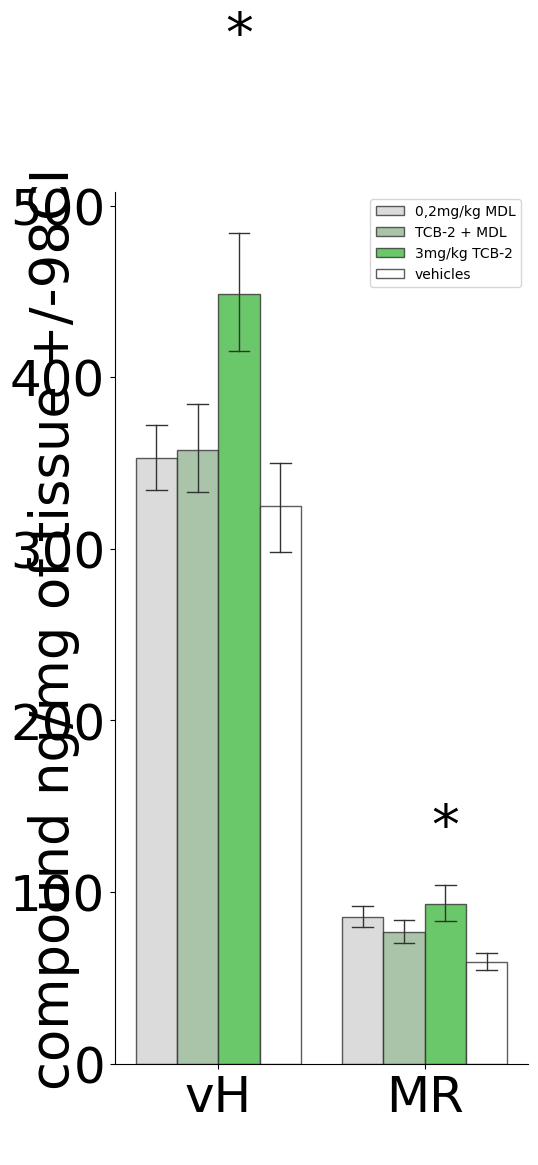

In [14]:
legit_regions = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]
high_DA = ['A','NAc', 'VM', 'DM', 'VL', 'DL', 'VTA']
low_DA = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","dH","vH","MD","VPL","VPR","DLG","HY","SC","SN","DR","MR","CB"]



DA_high_sig = ['A','NAc', 'MD', 'HY'] #CROP 4 FIG / agg_antag ["NAc", "VM", "DM", "VL", "DL"]
DA_low_sig = ["PL","aCC","S1L","S1R","DLG","HY","SC","DR"] #  /   agg_antag ["PL", "aCC", "S1L", "MR"]
DOPAC_DA_sig = ["PL","aCC", "S1R","DM","DLG","CB"]
toiMT_DA_sig = ["NAc","VM","DM","VL","DL"]
HVA_DA_sig = ["dH", "HY", "SC","CB", "VTA"] #VTA sig two way agg antag 

NA_sig= ['aCC','vH', 'NAc','VPR','HY', 'SC', 'SN','VTA'] #VMA/NA in DLG add vH too for summary style / agg_ant ["aCC", "vH"]
VMA_NA_sig = ['DLG']

# "aCC" # ['5HT', 'DA', "NA", 'HVA'] # ["5HIAA/5HT", "5HT/5HTP", "DOPAC/DA"]

from module.core.Figure import Histogram
hist = Histogram('TCB2', 
                experiment='agonist antagonist', 
                compound=['ASP'], 
                region= ['MR','vH'], 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                # custom_params={"fig_width": 20},  # fixed fig with bar width vaires 
                # custom_params={"ylabel_x": -0.02},
                )

# Histogram('TCB2', experiment="dose response", compound="5HIAA/5HT", region=None, from_scratch=True, remove_outliers=True)
# Histogram('TCB2', compound="5HIAA/5HT", region=['CE'], from_scratch=True, handle_outliers=False)
# Histogram('TCB2', compound="5HIAA/5HT", region=['CE'], from_scratch=True)
# Histogram('TCB2', compound="5HIAA/5HT", from_scratch=True)

# hist.statistics.select( test = 'tukey').result

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0,3mg/kg TCB-2 vs. 3mg/kg TCB-2: Custom statistical test, P_val:1.220e-02
0,3mg/kg TCB-2 vs. 10mg/kg TCB-2: Custom statistical test, P_val:1.000e-04
vehicles vs. 3mg/kg TCB-2: Custom statistical test, P_val:1.400e-03
vehicles vs. 10mg/kg TCB-2: Custom statistical test, P_val:0.000e+00
SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/dose response/DA in aCC.png
SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/dose response/DA in aCC.svg


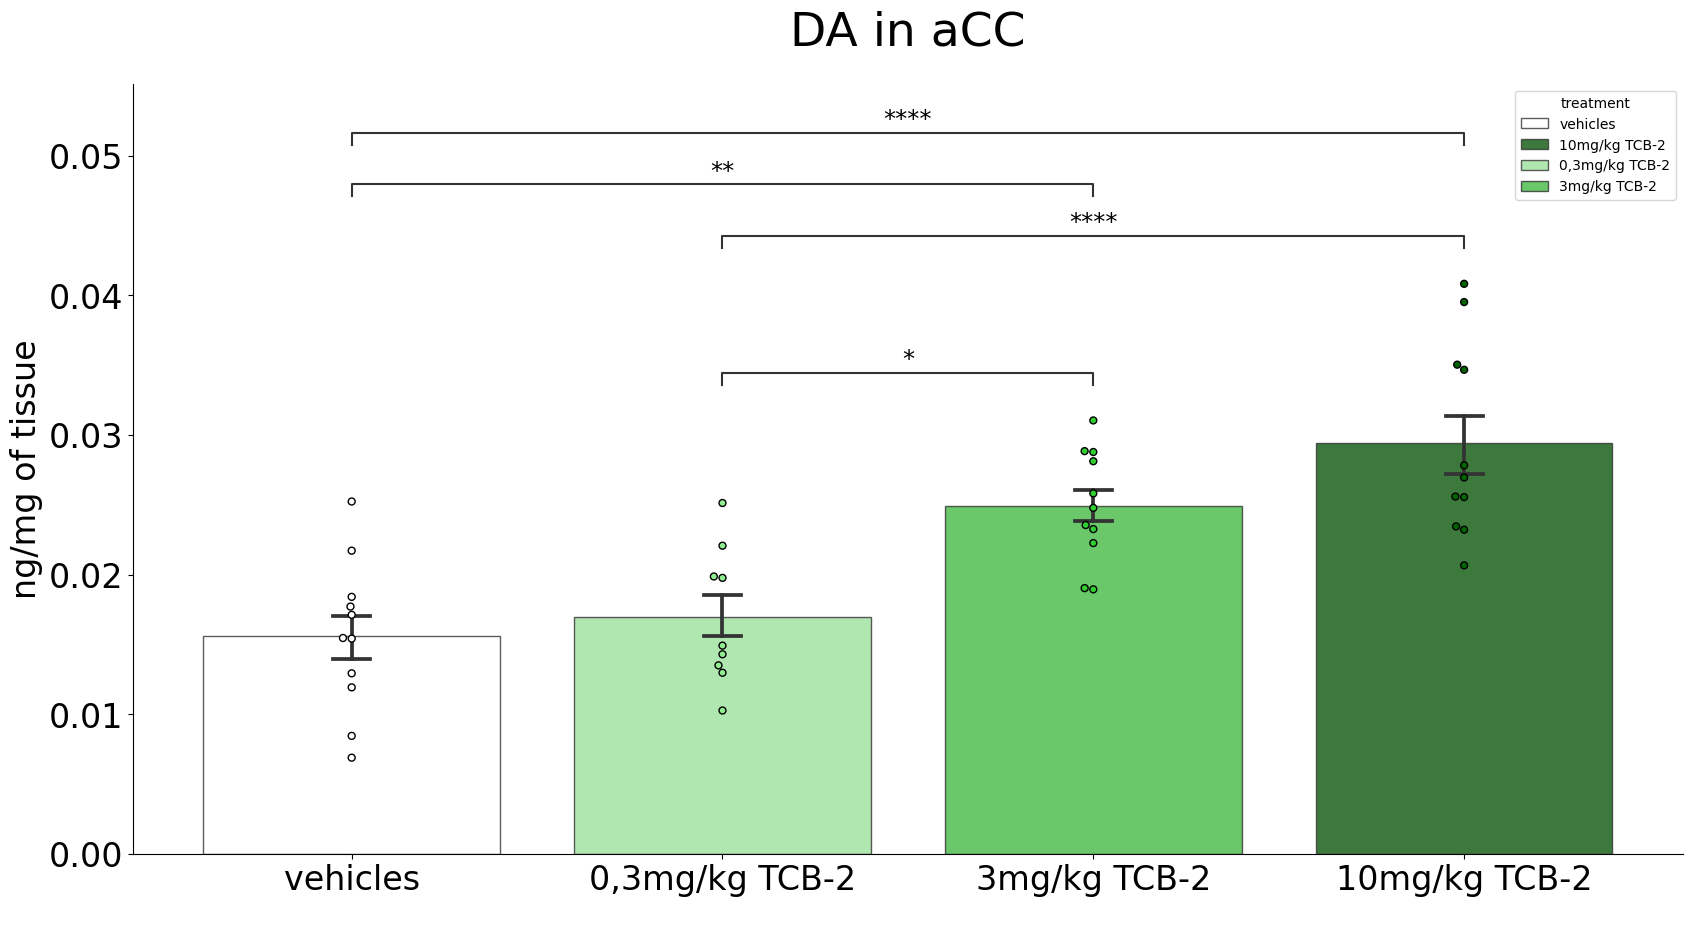

In [7]:
from module.core.Figure import Histogram
hist = Histogram(project = 'TCB2', 
                experiment='dose response', 
                compound="DA", 
                region= ["aCC"], 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                # custom_params={"ylabel_x": -0.1}
                )


In [8]:
hist.statistics.select(test='one_way_anova').result


# F (degrees of freedom between, degrees of freedom within)
# F(3,37) dopse resp
# F(1, 37) agg antag 

,F,p_value
0,15.496591,9.677579e-07


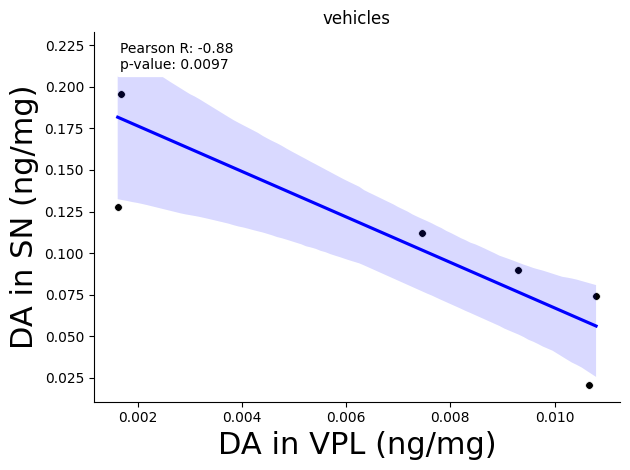

SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/correlation/DA in ['VPL', 'SN'].png
SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/correlation/DA in ['VPL', 'SN'].svg


Correlation(project='TCB2', experiment='agonist antagonist', treatment='vehicles', compound='DA', region=['VPL', 'SN'], remove_outliers='calculated', p_value_threshold=0.05, filepath="/Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/agonist antagonist/correlation/DA in ['VPL', 'SN'].png", from_scratch=True, custom_params={}, columns=None, n_minimum=5, method='pearson', figure_type='correlation')

In [8]:
# SINGLE CORRECLATION
from module.core.Figure import Correlation 



Correlation(project ='TCB2', 
                experiment='agonist antagonist', 
                treatment = 'vehicles',
                compound='DA', 
                region= ['VPL','SN'], 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                )

Creating matrices: 100%|██████████| 6/6 [00:06<00:00,  1.08s/it]

0,3mg/kg TCB-2 insuficient overlapp for [(('5HT', 'SJ'), ('DA', 'MR')), (('5HT', 'S1R'), ('DA', 'MR')), (('5HT', 'SC'), ('DA', 'MR'))] pairs
Inspect with self.corr to adjust {columns} and redo analysis


SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/correlogram/['5HT', 'DA'] in ['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'].png
SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/correlogram/['5HT', 'DA'] in ['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'].svg


Correlogram(project='TCB2', experiment=None, treatment=None, compound=['5HT', 'DA'], region=['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'], remove_outliers='calculated', p_value_threshold=0.05, filepath="/Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/correlogram/['5HT', 'DA'] in ['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'].png", from_scratch=True, custom_params={}, columns=None, n_minimum=5, method='pearson', figure_type='correlogram')

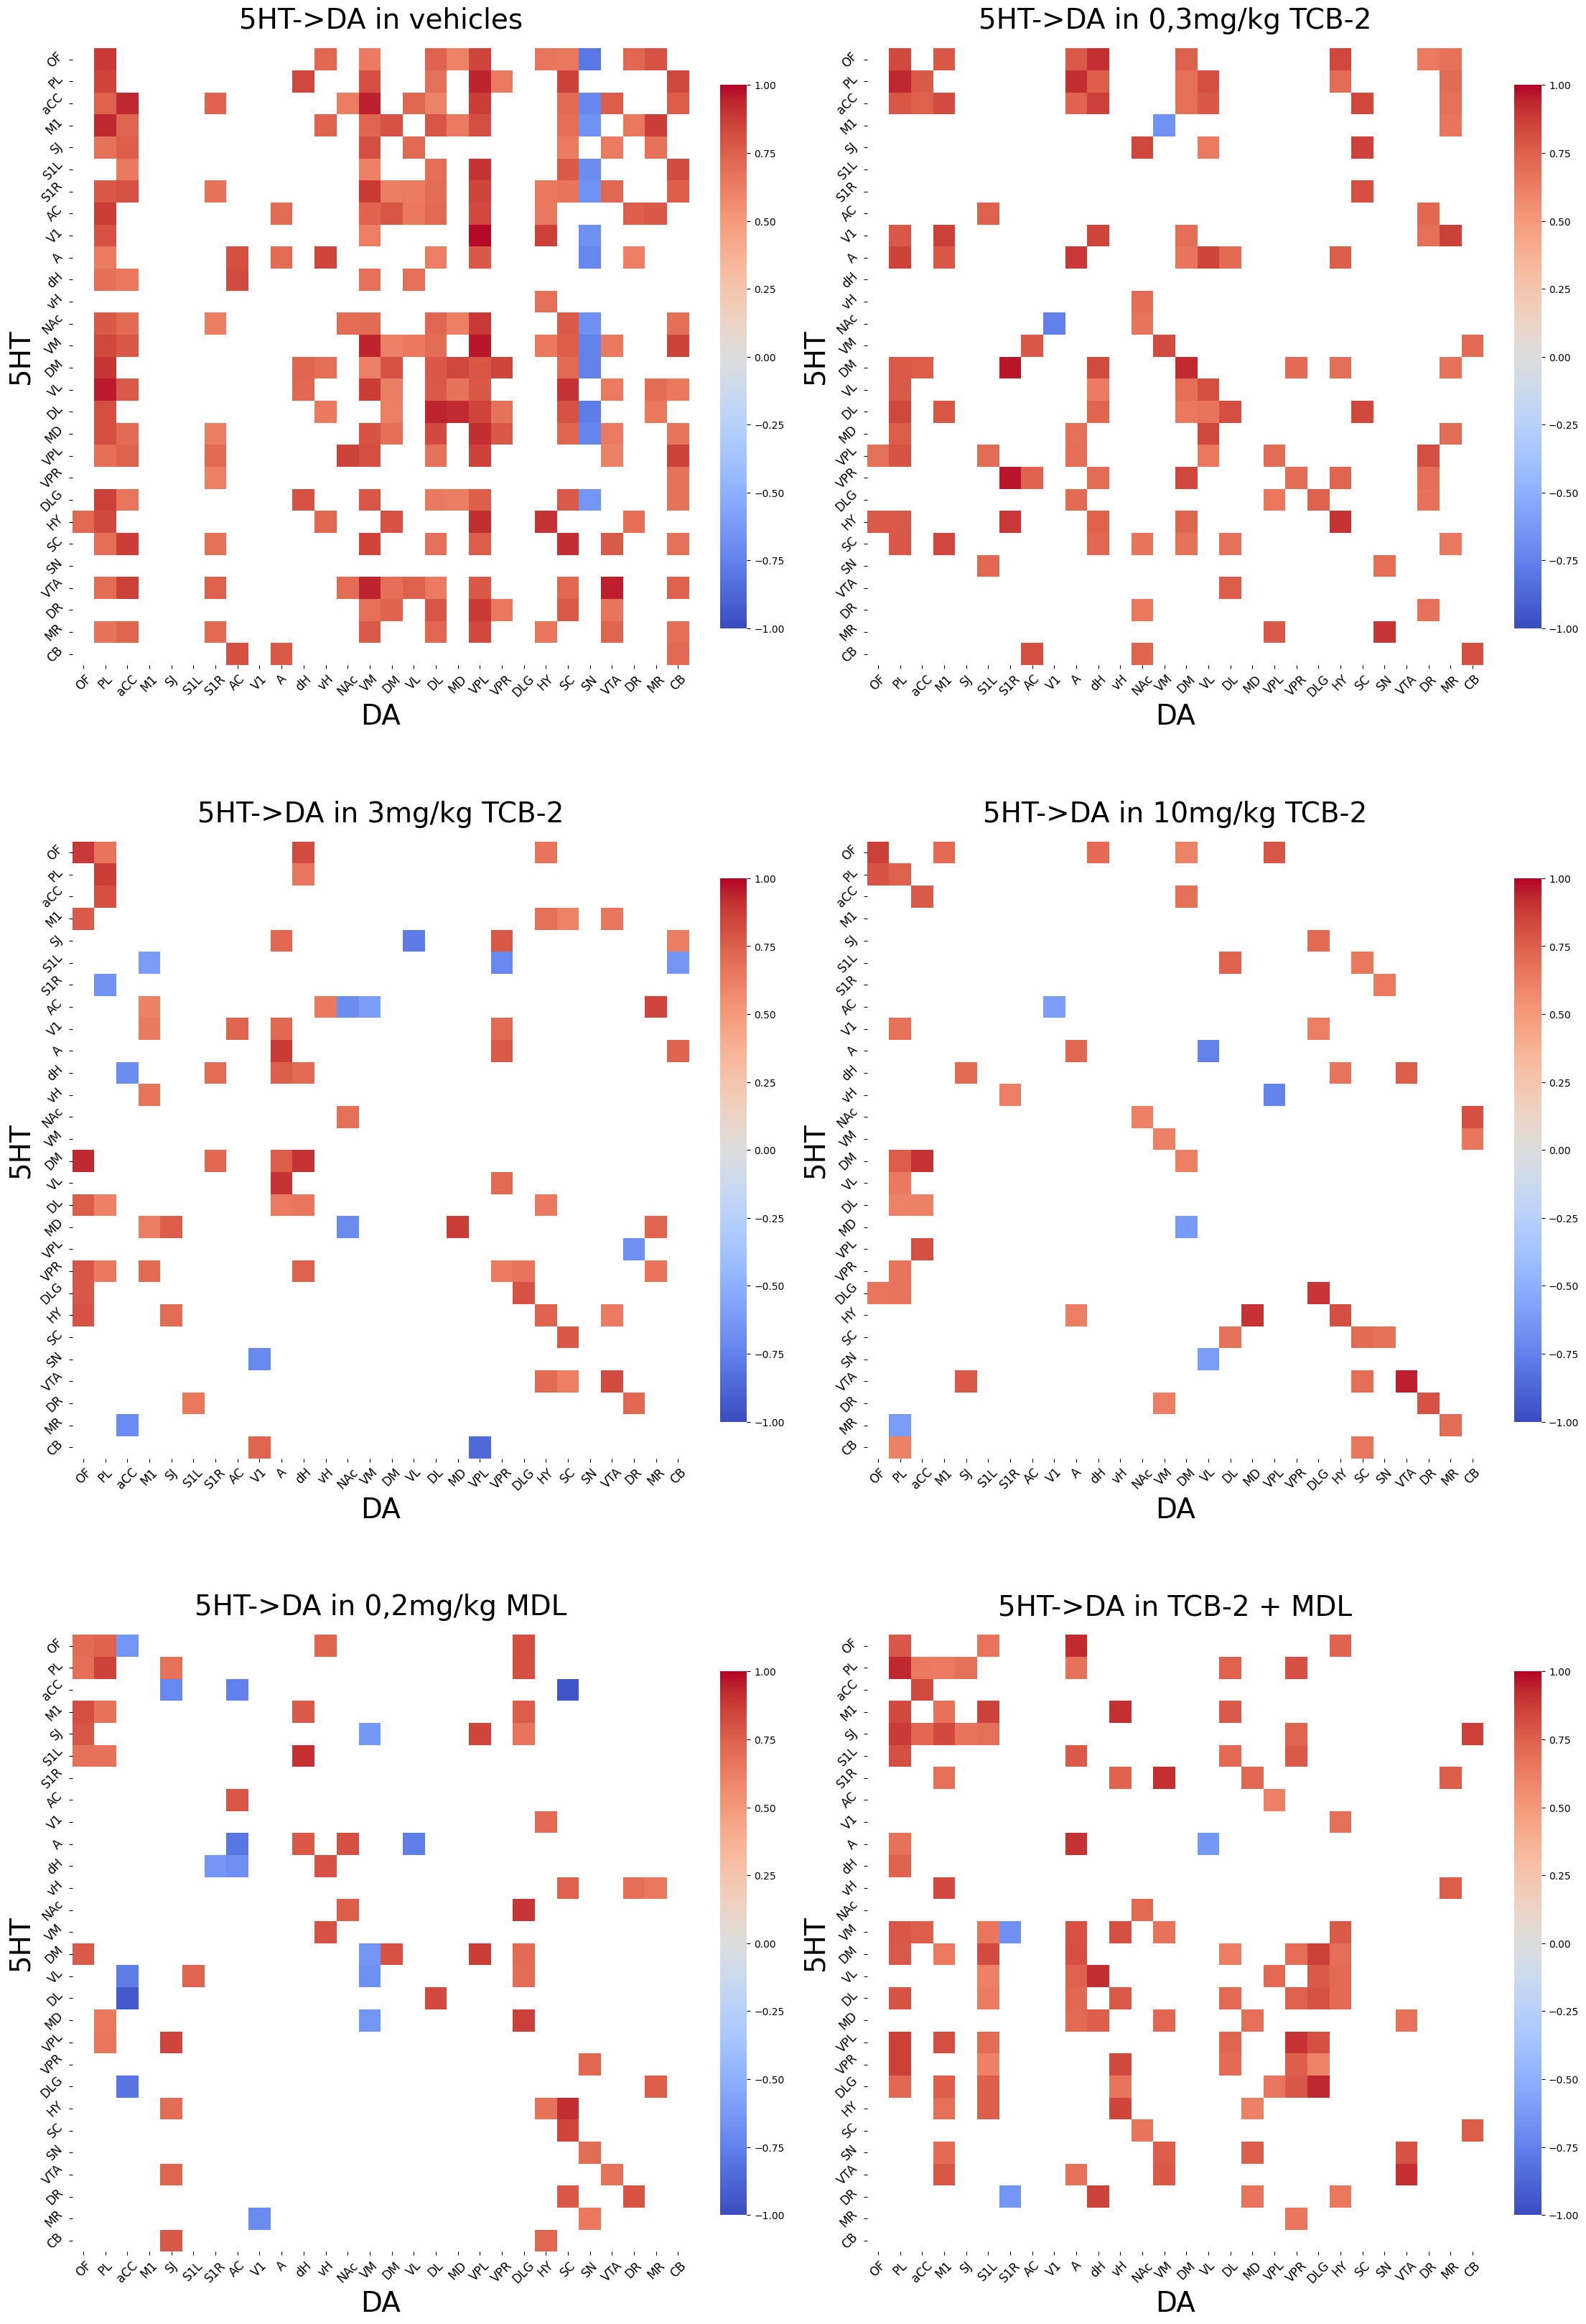

In [7]:
from module.core.Figure import Correlogram 

legit_regions = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]


Correlogram(project ='TCB2', 
                # experiment='agonist antagonist', 
                compound='5HT-DA', 
                region= legit_regions, 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                )

In [8]:
legit_regions = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]
print(len(legit_regions))

28


In [3]:
from module.core.Figure import Network 
from module.core.Constants import * 

legit_regions = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]

node_positions = {'OF': (5.9,2.4), 
                  'PL': (5.6, 3.5), 
                  'aCC':(7.1,4), 
                  'M1':(6.2,3.8), 
                  'SJ': (7.5,3.8), 
                  'S1L':(8.5,3.8), 'S1R': (8.2,4.1), 
                  'AC': (9.9,4.2), 
                  'V1': (10.9,4), 
                  'MD': (10.3,1.45), 
                  'VPR': (9.1,1.45), 'VPL': (9.4,1.15), 
                  'DLG': (9.7,1.9)
}

Network(project ='TCB2', 
                # experiment='agonist antagonist', 
                node_positions = node_positions,
                compound='5HT', 
                region= REGION_CLASSES['thalamocortical_interaction'], 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                )

# print (REGION_CLASSES['thalamocortical_interaction'])

In [ ]:
# GRAPH TABLE 


In [1]:
#TABLES 
# shapiro wilk and % of groups normal (+ non parametric versions of all)
# tissue weights
# publication table of quantatiatve data 

from module.core.Figure import Table

legit_regions = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]


Table(project ='TCB2', 
                # experiment='project', 
                compound=['5HT', '5HIAA', 'DA', 'DOPAC', 'HVA', '3MT', 'NA'], #SD
                treatment = 'vehicles',
                region= legit_regions, 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                )


/Users/jasminebutler/Desktop/phd/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CREATED AND CACHED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/['5HT', '5HIAA', 'DA', 'DOPAC', 'HVA', '3MT', 'NA'] in ['OF', 'PL', 'aCC', 'M1', 'SJ', 'S1L', 'S1R', 'AC', 'V1', 'A', 'dH', 'vH', 'NAc', 'VM', 'DM', 'VL', 'DL', 'MD', 'VPL', 'VPR', 'DLG', 'HY', 'SC', 'SN', 'VTA', 'DR', 'MR', 'CB'].xlsx


,compound,5HT,5HIAA,DA,DOPAC,HVA,3MT,NA
0,treatment,vehicles,vehicles,vehicles,vehicles,vehicles,vehicles,vehicles
1,region,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OF,0.137 ± 0.071,0.148 ± 0.068,0.015 ± 0.007,0.037 ± 0.012,0.093 ± 0.046,NaN,0.240 ± 0.075
3,PL,0.097 ± 0.047,0.106 ± 0.046,0.019 ± 0.008,0.032 ± 0.011,0.082 ± 0.033,NaN,0.111 ± 0.069
4,aCC,0.052 ± 0.021,0.140 ± 0.059,0.016 ± 0.005,0.023 ± 0.010,0.056 ± 0.021,NaN,0.228 ± 0.055
5,M1,0.165 ± 0.075,0.034 ± 0.016,0.013 ± 0.004,0.006 ± 0.005,0.046 ± 0.018,NaN,0.171 ± 0.055
6,SJ,0.116 ± 0.076,0.136 ± 0.091,0.004 ± 0.004,0.047 ± 0.023,0.125 ± 0.063,NaN,0.084 ± 0.052
7,S1L,0.092 ± 0.051,0.129 ± 0.080,0.004 ± 0.002,0.006 ± 0.005,0.047 ± 0.031,NaN,0.272 ± 0.081
8,S1R,0.066 ± 0.027,0.095 ± 0.030,0.005 ± 0.003,0.006 ± 0.001,0.034 ± 0.009,NaN,0.205 ± 0.038
9,AC,0.070 ± 0.030,0.088 ± 0.044,0.009 ± 0.002,0.025 ± 0.022,0.033 ± 0.016,NaN,0.153 ± 0.051
